## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../data/diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [60]:
df.mean()

AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

In [61]:
df.var()

AGE     171.846610
SEX       0.249561
BMI      19.519798
BP      191.304401
S1     1197.717241
S2      924.955494
S3      167.293585
S4        1.665261
S5        0.272892
S6      132.165712
Y      5943.331348
dtype: float64

### Task 2: Plot boxplots for BMI, BP and Y depending on gender

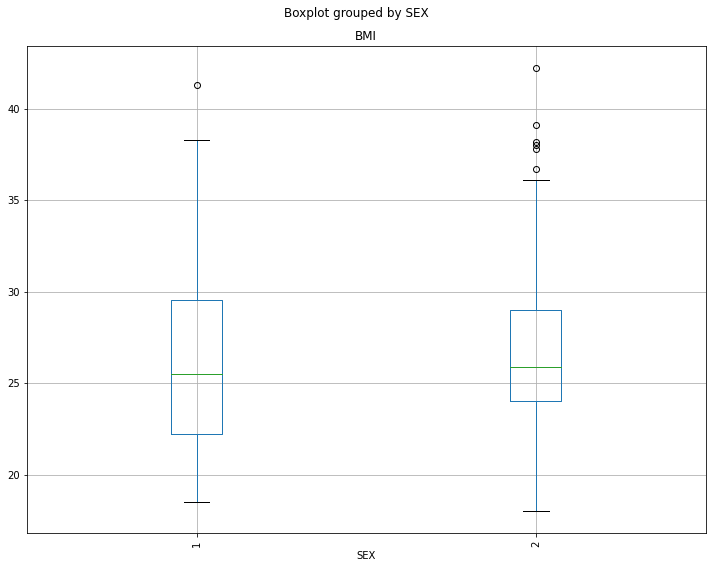

In [17]:
df.boxplot(column='BMI', by='SEX', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

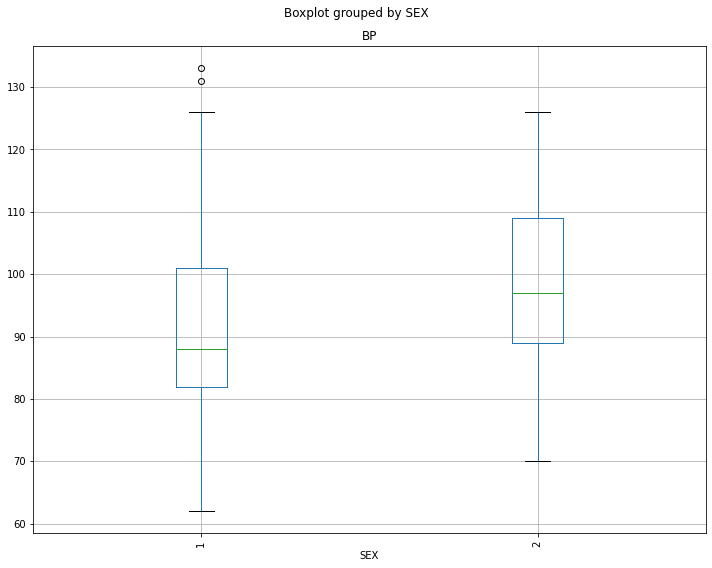

In [18]:
df.boxplot(column='BP', by='SEX', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

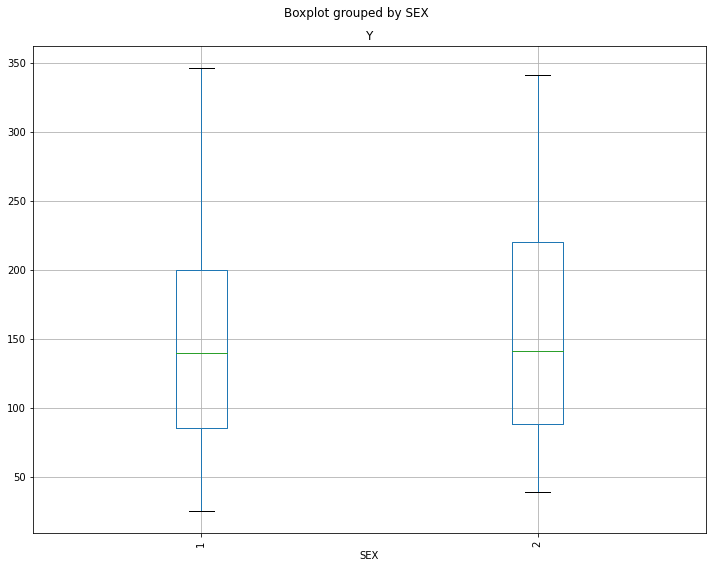

In [19]:
df.boxplot(column='Y', by='SEX', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

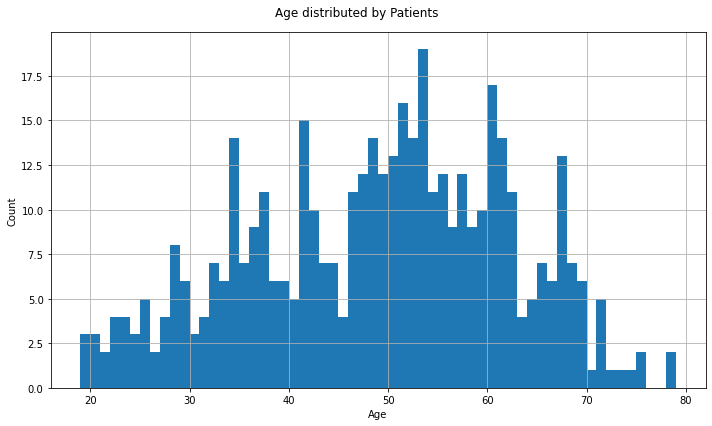

In [45]:
df['AGE'].hist(bins=60, figsize=(10,6))
plt.suptitle('Age distributed by Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

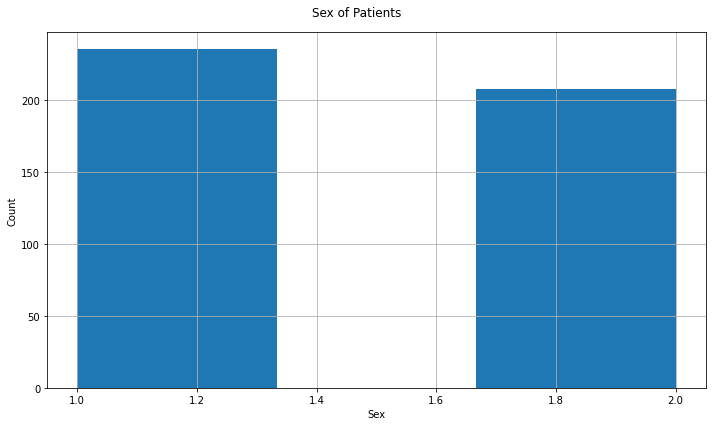

In [37]:
df['SEX'].hist(bins=3, figsize=(10,6))
plt.suptitle('Sex of Patients')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

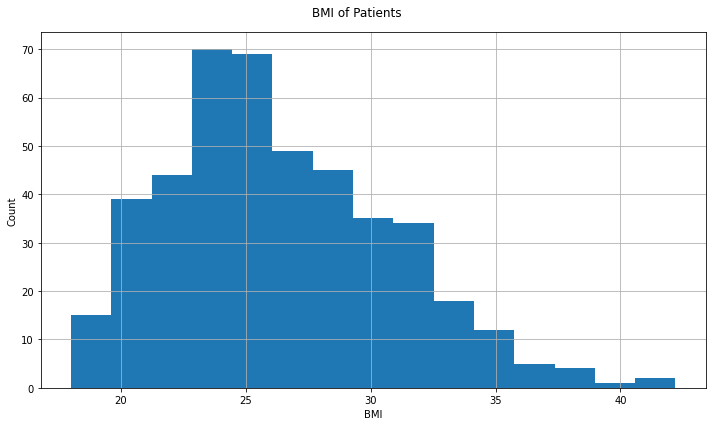

In [40]:
df['BMI'].hist(bins=15, figsize=(10,6))
plt.suptitle('BMI of Patients')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

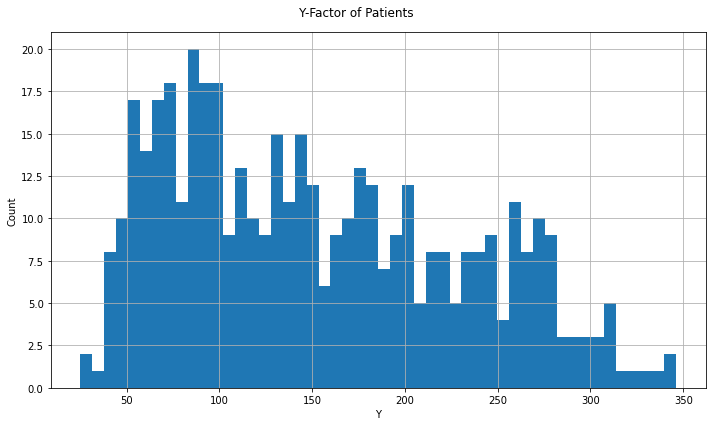

In [47]:
df['Y'].hist(bins=50, figsize=(10,6))
plt.suptitle('Y-Factor of Patients')
plt.xlabel('Y')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The distribution of the Values is quite different.

Age is not 100% in a normal distribution, since their are some ages underrepresented.

Gender is as expected only in two dimensions.

BMI is a normal distribution with a shift to lower numbers.

Y Factor is not really in a normal distribution. There is a peak between 50 and 100 and then slowly descending.

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [51]:
df.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


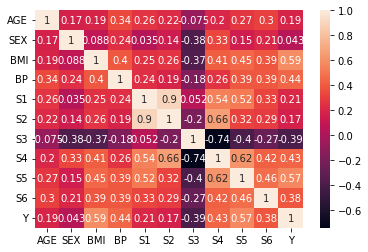

In [53]:
sns.heatmap(df.corr(), annot=True)
plt.show()

There are a few factors, that correlate with the progress of the disease. Highest Impact has BMI and S5, while S3 is on a negativ correlation.

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [56]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['SEX']==1,['Y']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['SEX']==2,['Y']],p)
    print(f'Conf={p:.2f}, Progression for Sex=1: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, Progression for Sex=2: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, Progression for Sex=1: 141.87..156.17, Progression for Sex=2: 147.79..163.55
Conf=0.90, Progression for Sex=1: 140.84..157.20, Progression for Sex=2: 146.66..164.68
Conf=0.95, Progression for Sex=1: 139.27..158.78, Progression for Sex=2: 144.92..166.42


In [57]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['SEX']==1,['Y']], df.loc[df['SEX']==2,['Y']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = -0.90
P-value: 0.3674449793083975


The Hypotesis seems to be wrong, since the P-Value is quite high with 0,36. Also the confidence intervalls seem not to support the Hypothesis.